In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# KNN

### Import data

In [2]:
data_train = np.load('data/fashion_train.npy', mmap_mode='r')
data_test = np.load('data/fashion_test.npy', mmap_mode='r')

In [3]:
X_train = data_train[:, :-1]
y_train = data_train[:, -1]
X_test = data_test[:, :-1]
y_test = data_test[:, -1]

### Cross validation

#### Finding number of components in LDA

In [12]:
def cross_val_mean(X, y, n, cv, method, n_components=None):
    """
    Calculates the mean score from each split in the cross-validation.

    input:
    X:
    y:
    n_values (list): List of number of neighbors to be tested
    cv (int): Number of splits
    method (str): 'lda', 'pca', 'standard', or 'default'

    output: mean score from each split
    """

    if method == 'lda':
        model = make_pipeline(StandardScaler(),LinearDiscriminantAnalysis(n_components=n_components), KNeighborsClassifier(n_neighbors=n))
    elif method == 'pca':
        model = make_pipeline(StandardScaler(),PCA(n_components=n_components), KNeighborsClassifier(n_neighbors=n))
    elif method == 'standard':
        model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=n))
    else:
        model = KNeighborsClassifier(n_neighbors=n)

    cv_result = cross_validate(model, X, y, cv=cv)
    cv_result = cv_result['test_score']

    return np.mean(cv_result)  # Return the mean score

In [ ]:
def cross_val_mean(X, y, n, cv, method, n_components=[1]):
    """
    Calculates the mean score from each split in the cross-validation.

    input:
    X:
    y:
    n_values (list): List of number of neighbors to be tested
    cv (int): Number of splits
    method (str): 'lda', 'pca', 'standard', or 'default'

    output: mean score from each split
    """
    result = {'N components': [], 'Neighbors': [], 'Score': []}

    for _n_c in n_components:
        for _n in n:
            if method == 'lda':
                model = make_pipeline(StandardScaler(),LinearDiscriminantAnalysis(n_components=n_components), KNeighborsClassifier(n_neighbors=n))
                result['N components'].append(_n_c)
                result['Neighbors'].append(_n)
                result['Score'].append(cross_validate(model, X, y, cv=cv))['test_score']

            elif method == 'pca':
                model = make_pipeline(StandardScaler(),PCA(n_components=n_components), KNeighborsClassifier(n_neighbors=n))
                result['N components'].append(_n_c)
                result['Neighbors'].append(_n)
                result['Score'].append(cross_validate(model, X, y, cv=cv))['test_score']

            elif method == 'standard':
                model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=n))
                result['N components'].append(_n_c)
                result['Neighbors'].append(_n)
                result['Score'].append(cross_validate(model, X, y, cv=cv))['test_score']

            else:
                model = KNeighborsClassifier(n_neighbors=n)
                result['N components'].append(_n_c)
                result['Neighbors'].append(_n)
                result['Score'].append(cross_validate(model, X, y, cv=cv))['test_score']

    #cv_result = cross_validate(model, X, y, cv=cv)
    #cv_result = cv_result['test_score']

    return np.mean(cv_result)  # Return the mean score

In [13]:
#seting number of neighbours and number of splits in the cross validation
n_values = [1, 3, 5, 7, 11, 13, 15, 17, 19, 21, 23]
cv = 5

In [15]:
lda_1 = [cross_val_mean(X_train, y_train, n, cv, 'lda', 1) for n in n_values]
lda_2 = [cross_val_mean(X_train, y_train, n, cv,'lda', 2) for n in n_values]
lda_3 = [cross_val_mean(X_train, y_train, n, cv, 'lda', 3) for n in n_values]
lda_4= [cross_val_mean(X_train, y_train, n, cv,'lda', 4) for n in n_values]

data_set_lda =[lda_1,lda_2,lda_3,lda_4]

In [16]:
pca_1 = [cross_val_mean(X_train, y_train, n, cv, 'pca', 0.91) for n in n_values]#90%
print('pca1 done')
pca_2 = [cross_val_mean(X_train, y_train, n, cv, 'pca', 0.92) for n in n_values]#92%
print('pca2 done')
pca_3 = [cross_val_mean(X_train, y_train, n, cv, 'pca', 0.93) for n in n_values] #93%
print('pca3 done')
pca_4 = [cross_val_mean(X_train, y_train, n, cv,'pca', 0.94) for n in n_values] #94%
print('pca4 done')
pca_5 = [cross_val_mean(X_train, y_train, n, cv, 'pca', 0.95) for n in n_values]#95%
print('pca5 done')

data_sets_pca = [pca_1,pca_2,pca_3,pca_4, pca_5]

pca1 done
pca2 done
pca3 done
pca4 done
pca5 done


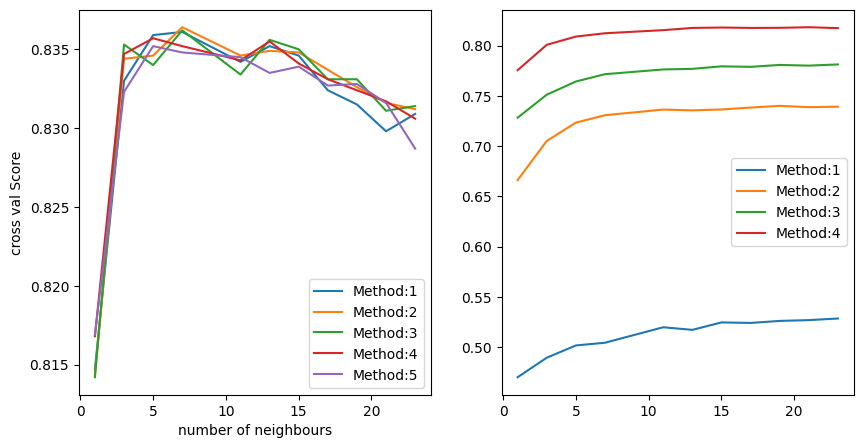

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))

# Plot each set of scores
for i, scores in enumerate(data_sets_pca):
    label = f'Method:{i+1}' 
    ax[0].plot(n_values,scores, label=label)

for i, scores in enumerate(data_set_lda):
    label = f'Method:{i+1}' 
    ax[1].plot(n_values,scores, label=label)

ax[0].set_xlabel('number of neighbours')
ax[0].set_ylabel('cross val Score')
ax[0].legend()
ax[1].legend()

# Save image
#plt.savefig("img/pca_pca_lda_cv.png")
plt.show()

An explained variance of 92 % gives the maximal accuracy for PCA. 4 components give the maximal accuracy for LDA.

#### Find the final model

We start by setting number of components in LDA to 4, and percentage of explained variance in PCA to 94 %.

In [20]:
def cross_val_mean(X, y, n, cv, method):
    """
    Calculates the mean score from each split in the cross-validation.

    input:
    X:
    y:
    n_values (list): List of number of neighbors to be tested
    cv (int): Number of splits
    method (str): 'lda', 'pca', 'standard', or 'default'

    output: mean score from each split
    """

    if method == 'lda':
        model = make_pipeline(StandardScaler(),LinearDiscriminantAnalysis(n_components=4), KNeighborsClassifier(n_neighbors=n))
    elif method == 'pca':
        model = make_pipeline(StandardScaler(),PCA(n_components=0.92), KNeighborsClassifier(n_neighbors=n))
    elif method == 'standard':
        model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=n))
    else:
        model = KNeighborsClassifier(n_neighbors=n)

    cv_result = cross_validate(model, X, y, cv=cv)
    cv_result = cv_result['test_score']

    return np.mean(cv_result)  # Return the mean score

In [21]:
#seting number of neighbours and number of splits in the cross validation
n_values = [1, 3, 5, 7, 11, 13, 15, 17, 19, 21, 23]
cv = 5

In [22]:
pca_all_scores = [cross_val_mean(X_train, y_train, n, cv, 'pca') for n in n_values]
lda_all_scores = [cross_val_mean(X_train, y_train, n, cv, 'lda') for n in n_values]
standard_all_scores = [cross_val_mean(X_train, y_train, n, cv, 'standard') for n in n_values]

In [23]:
data_set_all_scores =[pca_all_scores,lda_all_scores, standard_all_scores]

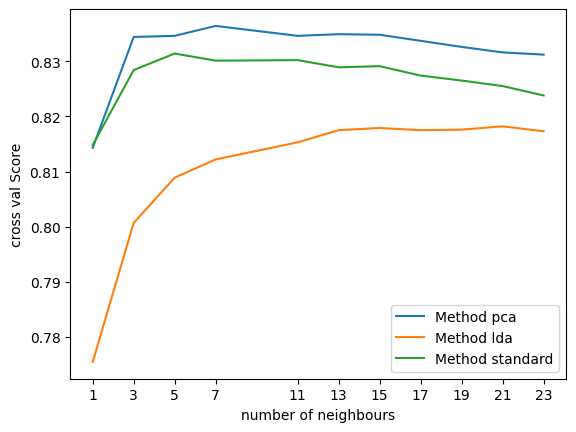

In [28]:
# Create a figure and axis
fig, ax = plt.subplots()

Methods =['pca','lda','standard']
# Plot each set of scores
for i, scores in enumerate(data_set_all_scores):
    label = f'Method {Methods[i]}'  # You can customize the labels
    ax.plot(n_values,scores, label=label)

# Add labels and legend
ax.set_xlabel('number of neighbours')
ax.set_ylabel('cross val Score')
ax.set_xticks(n_values)
ax.legend()

# Show the plot
plt.savefig("cross_val_knn_lda_pca.png")
plt.show()

### Train on all training data

First we standardise data.

In [25]:
sc = StandardScaler()
sc.fit(X_train)

# Transform training data
X_train_std = sc.transform(X_train)

# Transform test data
X_test_std = sc.transform(X_test)

Data is transformed with pca.

In [26]:
pca = PCA(0.92)
pca.fit(X_train_std)

# Tranform training data
pc_train = pca.transform(X_train_std)

# Transform test data
pc_test = pca.transform(X_test_std)

Train KNN.

In [31]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(pc_train, y_train);

### Test

In [32]:
yhat = knn.predict(pc_test)
yhat_proba = knn.predict_proba(pc_test)

Accuracy score

In [33]:
accuracy_score(y_test, yhat)

0.8254

COnfusion matrix

In [34]:
_confusion_matrix=confusion_matrix(y_test, yhat)
_confusion_matrix

array([[835,   0,  19,  29, 117],
       [ 10, 952,   8,  23,   7],
       [ 17,   0, 819,  20, 144],
       [ 45,   5,  16, 902,  32],
       [189,   2, 158,  32, 619]], dtype=int64)

Recall and precision

In [35]:
test_scores = {'Class':[], 'Recall': [], 'Precision': []}

for i in range(5):
    TP = _confusion_matrix[i,i]
    FP = sum(_confusion_matrix[:,i])-TP
    FN = sum(_confusion_matrix[i,:])-TP
    TN = np.sum(_confusion_matrix)- TP-FP-FN

    test_scores['Class'].append(i)

    # Recall: TP/(TP+FN)
    test_scores['Recall'].append(TP/(TP+FN))
    # Precision: TP/(TP+FP)
    test_scores['Precision'].append(TP/(TP+FP))

In [36]:
test_scores_df = pd.DataFrame(test_scores)
test_scores_df

,Class,Recall,Precision
0,0,0.835,0.761861
1,1,0.952,0.992701
2,2,0.819,0.802941
3,3,0.902,0.896620
4,4,0.619,0.673558
